In [1]:
import pandas as pd
from google import search

# Overview: Purpose is to develop methodology to create a network of Item banks, Platforms, and School Districts

## Creating Spreadsheets

Step 1: Item Banks and Partners.  Go to all Item banks in the table presented in the NCME presentation, and find the assoicated platform partners. From here, go to each platform partner website and find any platform parters that look like they could possibly also use items from the item bank. Therefore, the manual search will look something like this:

Step 2: Large School Districts. Go to the wikipedia page, and find the largest school districts in the country (right now, there are only 50). 

In [2]:
item_partners = pd.read_csv("/Users/amyburkhardt/Dropbox/ItemBankInvestigation/ItemBank_Network.csv")
item_partners['ItemBankPartners'] = '"' + item_partners['ItemBankPartners'] + '"'
item_partners['PlatformPartners'] = '"' + item_partners['PlatformPartners'] + '"'
item_partners.head(5)

KeyError: 'PlatformPartners'

In [3]:
schools = pd.read_csv("/Users/amyburkhardt/Dropbox/ItemBankInvestigation/schoolDistricts.csv")
schools['School District'] = '"' + schools['School District'] + '"'
schools.head()

School District
0  "New York City Department of Education"
1    "Los Angeles Unified School District"
2    "Puerto Rico Department of Education"
3                 "Chicago Public Schools"
4       "Miami-Dade County Public Schools"

## Create Search Terms

For every ItemBankPartners and PlatformsPartners, combine with the school district to create search_terms for every record. For example, the search_terms for the first observation will be the following: <p>
"'Five-star technology solutions'" AND "'New York City Department of Education'" <p>
"'close education'" AND "'New York City Department of Education'" <p>
"'Five-star technology solutions'" AND "'Los Angeles Unified School District'" <p>
"'close education'" AND "'Los Angeles Unified School District'" <p>
. <p>
. <p>
. <p>
etc.

In [4]:
item_bank_partners = item_partners[['ItemBankPartners']]
item_bank_partners = item_bank_partners.rename(columns = {'ItemBankPartners': 'vendor'})
eligible_vendors = item_bank_partners.copy()
eligible_vendors  = eligible_vendors.drop_duplicates()

In [5]:
eligible_vendors

vendor
0       "Five-star technology solutions"
12                     "onHands Schools"
13                           "Edluastic"
15                         "PowerSchool"
16                           "eduphoria"
20                                "Otus"
21                           "eDoctrina"
22                     "Mastery Connect"
23                 "performance matters"
24                "illuminate education"
25                       "FOCALPOINTK12"
26                             "engrade"
27                          "SchoolCity"
28                               "Naiku"
29                                "OARS"
30                           "oncourse "
31                           "schoolnet"
32  "Assessment Technology Incorporated"
33                            "Edupoint"
34                        "io education"

In [5]:
search_terms = []
for school in schools['School District']:
    term = "{} AND assessment".format(school, school)
    search_terms.append(term)
search_terms

['"New York City Department of Education" AND assessment',
 '"Los Angeles Unified School District" AND assessment',
 '"Puerto Rico Department of Education" AND assessment',
 '"Chicago Public Schools" AND assessment',
 '"Miami-Dade County Public Schools" AND assessment',
 '"Clark County School District" AND assessment',
 '"Broward County Public Schools" AND assessment',
 '"Houston Independent School District" AND assessment',
 '"Hillsborough County Public Schools" AND assessment',
 '"Hawai_i Department of Education" AND assessment',
 '"Orange County Public Schools" AND assessment',
 '"School District of Palm Beach County" AND assessment',
 '"Fairfax County Public Schools" AND assessment',
 '"School District of Philadelphia" AND assessment',
 '"Gwinnett County Public Schools" AND assessment',
 '"Dallas Independent School District" AND assessment',
 '"Wake County Public School System" AND assessment',
 '"Montgomery County Public Schools" AND assessment',
 '"Charlotte-Mecklenburg Schools" 

In [6]:
returned_urls = []
phrase = []
for item in search_terms:
    for url in search(item, start = 1, stop = 2, num = 1, pause = 8):
        returned = url
        returned_urls.append(url)
        phrase.append(item)
returned_urls
phrase

HTTPError: HTTP Error 503: Service Unavailable

In [7]:
returned_urls

['http://schools.nyc.gov/Accountability/resources/testing/',
 'https://achieve.lausd.net/Page/6564',
 'https://www2.ed.gov/admins/lead/account/finalassess/pr.html',
 'http://cps.edu/Pages/TeachingandLearning.aspx',
 'http://oada.dadeschools.net/TestChairInfo/InfoForTestChair.asp',
 'http://www.ccsd.net/divisions/assessment-accountability-research-school-improvement-division/assessment',
 'http://www.browardschools.com/departments/student-assessment-and-research',
 'https://www.glassdoor.com/job-listing/student-assessment-specialist-houston-independent-school-district-JV_IC1140171_KO0,29_KE30,65.htm?jl=2518747814',
 'http://www.sdhc.k12.fl.us/doc/list/assessment-and-accountability/contacts/33-160/',
 'http://www.hawaiipublicschools.org/TeachingAndLearning/Testing/StateAssessment/Pages/home.aspx',
 'https://www.ocps.net/departments/curriculum__instruction_and_digital_learning/early_childhood/assessment_resources/',
 'https://www.palmbeachschools.org/assessment/fsa/',
 'https://www.fcps.e

In [8]:
phrase

['"New York City Department of Education" AND assessment',
 '"Los Angeles Unified School District" AND assessment',
 '"Puerto Rico Department of Education" AND assessment',
 '"Chicago Public Schools" AND assessment',
 '"Miami-Dade County Public Schools" AND assessment',
 '"Clark County School District" AND assessment',
 '"Broward County Public Schools" AND assessment',
 '"Houston Independent School District" AND assessment',
 '"Hillsborough County Public Schools" AND assessment',
 '"Hawai_i Department of Education" AND assessment',
 '"Orange County Public Schools" AND assessment',
 '"School District of Palm Beach County" AND assessment',
 '"Fairfax County Public Schools" AND assessment',
 '"School District of Philadelphia" AND assessment',
 '"Gwinnett County Public Schools" AND assessment',
 '"Dallas Independent School District" AND assessment',
 '"Wake County Public School System" AND assessment',
 '"Montgomery County Public Schools" AND assessment',
 '"Charlotte-Mecklenburg Schools" 

In [9]:
# put the two lists into a dataframe
returned_list = pd.DataFrame (
{
 'returned_urls': returned_urls,
 'phrase': phrase
    
})

In [10]:
pd.set_option("display.max_colwidth", 999)
returned_list

phrase  \
0           "New York City Department of Education" AND assessment   
1             "Los Angeles Unified School District" AND assessment   
2             "Puerto Rico Department of Education" AND assessment   
3                          "Chicago Public Schools" AND assessment   
4                "Miami-Dade County Public Schools" AND assessment   
5                    "Clark County School District" AND assessment   
6                   "Broward County Public Schools" AND assessment   
7             "Houston Independent School District" AND assessment   
8              "Hillsborough County Public Schools" AND assessment   
9                 "Hawai_i Department of Education" AND assessment   
10                   "Orange County Public Schools" AND assessment   
11           "School District of Palm Beach County" AND assessment   
12                  "Fairfax County Public Schools" AND assessment   
13                "School District of Philadelphia" AND assessment   
14                 "Gwinnett County Public Schools" AND assessment   
15             "Dallas Independent School District" AND assessment   
16               "Wake County Public School System" AND assessment   
17               "Montgomery County Public Schools" AND assessment   
18                  "Charlotte-Mecklenburg Schools" AND assessment   
19              "San Diego Unified School District" AND assessment   
20          "Prince George's County Public Schools" AND assessment   
21                    "Duval County Public Schools" AND assessment   
22                           "Memphis City Schools" AND assessment   
23                    "Cobb County School District" AND assessment   
24  "Cypress-Fairbanks Independent School District" AND assessment   
25                "Baltimore County Public Schools" AND assessment   
26                        "Pinellas County Schools" AND assessment   
27                    "DeKalb County School System" AND assessment   
28                "Jefferson County Public Schools" AND assessment   
29          "Northside Independent School District" AND assessment   
30                     "Albuquerque Public Schools" AND assessment   
31                     "Polk County Public Schools" AND assessment   
32                    "Fulton County School System" AND assessment   
33                "Jefferson County Public Schools" AND assessment   
34             "Austin Independent School District" AND assessment   
35             "Long Beach Unified School District" AND assessment   
36            "Baltimore City Public School System" AND assessment   
37                  "School District of Lee County" AND assessment   
38         "Fort Worth Independent School District" AND assessment   
39                       "Milwaukee Public Schools" AND assessment   
40           "Prince William County Public Schools" AND assessment   
41          "Metropolitan Nashville Public Schools" AND assessment   
42                          "Denver Public Schools" AND assessment   
43                         "Detroit Public Schools" AND assessment   

                                                                                                                                            returned_urls  
0                                                                                                http://schools.nyc.gov/Accountability/resources/testing/  
1                                                                                                                     https://achieve.lausd.net/Page/6564  
2                                                                                             https://www2.ed.gov/admins/lead/account/finalassess/pr.html  
3                                                                                                           http://cps.edu/Pages/TeachingandLearning.aspx  
4                                                                                          http://oada.dadeschools.net/TestChairI

### Examples (officie school documents, press releases, or from the vendor's website)

"eDoctrina" AND "New York City Department of Education" AND assessment	(KeyData System)
https://www.regents.nysed.gov/common/regents/files/215p12a3.pdf


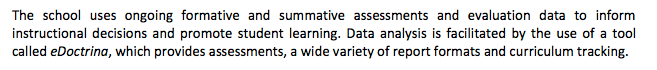

"Mastery Connect" AND "New York City Department of Education" AND assessment  <p>

http://schools.nyc.gov/documents/oaosi/cep/2016-17/cep_M189.pdf


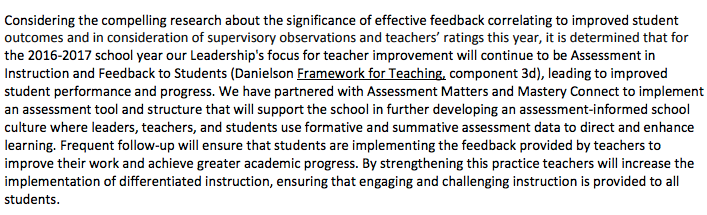

"io education" AND "New York City Department of Education" AND assessment	
http://schools.nyc.gov/documents/oaosi/cep/2016-17/cep_X131.pdf


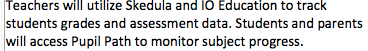

"illuminate education" AND "Los Angeles Unified School District" AND assessment <p>
https://www.illuminateed.com/blog/category/case-study/

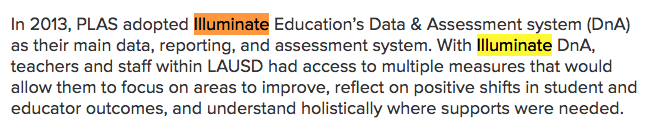

In [ ]:
! python --version

In [ ]:
a9a9c95001844c0b8d2e9ab6f700e7b8